# Experiment #6: Artificial Neural Networks
<b>Mohammed Abed Alkareem</b>
<b>1210708</b>

## 5. Implementing Perceptron in Python

### Example 1:
 Python code for a binary classifier perceptron with a step activation function and SGD
training method. Note that, in SGD, the model parameters are updated after each selected sample.

In [41]:
import numpy as np
class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        # Initialize weights and bias with random values
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        # Set learning rate and number of epochs
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step_activation(self, x):
        # Step activation function
        return 1 if x >= 0 else 0
    
    def predict(self, x):
        # Compute the weighted sum of inputs and bias
        net_input = np.dot(x, self.weights) + self.bias
        # Apply step activation function to the net input
        return self.step_activation(net_input)
    
    def trainSGD(self, X, y):
        # Training loop
        for epoch in range(self.epochs):

            # Initialize Mean Squared Error for this epoch
            total_mse = 0.0

            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # Iterate over each shuffled training example
            for i in range(len(X_shuffled)):
                # Make a prediction for the current input
                prediction = self.predict(X_shuffled[i])
                # Compute the error (desired - predicted)
                error = y_shuffled[i] - prediction
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * error * X_shuffled[i]
                self.bias += self.learning_rate * error
                # Accumulate the squared error for this example
                total_mse += error ** 2

            # Calculate the mean squared error for this epoch
            mean_mse = total_mse / len(X)
            # print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error:{mean_mse:.4f}")

In [42]:
# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=10)

# Train the perceptron on the dataset
perceptron.trainSGD(X, y)

# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

for data in test_data:
    prediction = perceptron.predict(data)
    print(f"Input: {data}, Prediction: {prediction}")

Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1


#### Task 6.1:
 Run the code in Example 1 with more epochs [10, 20, 100, and 200] and compute the
accuracy of the tested samples for each case. Did we need to run with more epochs? Justify your
answer.

In [43]:
from sklearn.metrics import accuracy_score

# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])



epochs = [10, 20, 100, 200]

for epoch in epochs:
    y_pred = []
    print(f"Training with {epoch} epochs")
    perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=epoch)
    perceptron.trainSGD(X, y)
    print()
    test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    for data in test_data:
        prediction = perceptron.predict(data)
        y_pred.append(prediction)
        print(f"Input: {data}, Prediction: {prediction}")

    print(f"Accuracy: {accuracy_score(y, y_pred)}")


Training with 10 epochs

Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1
Accuracy: 0.25
Training with 20 epochs

Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1
Accuracy: 0.5
Training with 100 epochs

Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1
Accuracy: 1.0
Training with 200 epochs

Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1
Accuracy: 1.0


100 epochs where enough as the acuuarcy becomes 1

#### Task 6.2:
Run the same code in Example 1 with a higher learning rate [0.05, 0.1, 0.3]. Draw on your
observations.

In [44]:
from sklearn.metrics import accuracy_score

# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

learning_rates = [0.05, 0.1, 0.3]

for learning_rate in learning_rates:
    y_pred = []
    print(f"\nTraining with {learning_rate} learning_rate")
    perceptron = Perceptron(input_size=2, learning_rate=learning_rate, epochs=10)
    perceptron.trainSGD(X, y)
    print()
    test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    for data in test_data:
        prediction = perceptron.predict(data)
        y_pred.append(prediction)
        print(f"Input: {data}, Prediction: {prediction}")

    print(f"Accuracy: {accuracy_score(y, y_pred)}")


Training with 0.05 learning_rate

Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1
Accuracy: 1.0

Training with 0.1 learning_rate

Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1
Accuracy: 1.0

Training with 0.3 learning_rate

Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1
Accuracy: 1.0


### Example 2:
 Python code for a perceptron with a linear activation function, MSE loss, and SGD
training method

In [45]:
import numpy as np
import pandas as pd
class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def linear(self, x): #Activation Function
        return x
    
    def linear_derivative(self, x):
        return 1
    
    def predict(self, x):
        net_input = np.dot(x, self.weights) + self.bias
        return self.linear(net_input)
    
    def trainSGD(self, X, y):
        all_mse = {'epoch':[], 'mse':[]}
        for epoch in range(self.epochs):

            # Initialize Mean Squared Error for this epoch
            total_mse = 0.0

            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            Y_shuffled = y[indices]

            # Iterate on each sample
            for i in range(len(X)):
                prediction = self.predict(X_shuffled[i])
                error = Y_shuffled[i] - prediction
                # Compute gradients using linear derivative
                delta = error * self.linear_derivative(prediction)
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * delta * X_shuffled[i]
                self.bias += self.learning_rate * delta
                # Accumulate the squared error for this example
                total_mse += error ** 2

            # Calculate the mean squared error for this epoch
            mean_mse = total_mse / len(X)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error:{mean_mse:.4f}")
            all_mse['epoch'].append(epoch)
            all_mse['mse'].append(mean_mse)
        
        return all_mse



In [46]:
np.random.seed(42) # For reproducibility
num_samples = 100
x = np.random.uniform(low=0, high=10, size=num_samples)
z = 3 * x + 2
# Create a DataFrame to store the data
data = pd.DataFrame({'x': x, 'z': z})
# Extract the values of all columns (variables x and y) except the last one fromDataFrame
F = data.iloc[:, :-1].values
# Extract the values of the last column (output z) from DataFrame
O = data.iloc[:, -1].values

# Create a perceptron instance with appropriate input size
input_size = 1
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=10)
# Train the perceptron on the dataset
perceptron.trainSGD(F, O)
#Test the trained model
pred_y_1 = []
for data in x:
    prediction = perceptron.predict(data)
    pred_y_1.append(prediction)
    print(f"Input: {data}, Actual: {3*data+2}, Prediction: {prediction} , Error: {(3*data+2)-prediction}")

Epoch 1/10, Mean Squared Error:54.4299
Epoch 2/10, Mean Squared Error:0.9345
Epoch 3/10, Mean Squared Error:0.8204
Epoch 4/10, Mean Squared Error:0.7764
Epoch 5/10, Mean Squared Error:0.7368
Epoch 6/10, Mean Squared Error:0.6914
Epoch 7/10, Mean Squared Error:0.6586
Epoch 8/10, Mean Squared Error:0.6233
Epoch 9/10, Mean Squared Error:0.5877
Epoch 10/10, Mean Squared Error:0.5563
Input: 3.745401188473625, Actual: 13.236203565420874, Prediction: [12.66615598] , Error: [0.57004758]
Input: 9.50714306409916, Actual: 30.521429192297482, Prediction: [31.18634273] , Error: [-0.66491354]
Input: 7.319939418114051, Actual: 23.959818254342153, Prediction: [24.1559306] , Error: [-0.19611235]
Input: 5.986584841970366, Actual: 19.959754525911098, Prediction: [19.87007811] , Error: [0.08967641]
Input: 1.5601864044243652, Actual: 6.680559213273096, Prediction: [5.64213673] , Error: [1.03842249]
Input: 1.5599452033620265, Actual: 6.679835610086079, Prediction: [5.64136143] , Error: [1.03847418]
Input: 0

#### Task 6.3:
Run the code in Example 2 and notice the difference between the actual output and the
predicted output.

the prdicted value is close to the actual data 

#### Task 6.4: 
Run the code in Example 2 with more epochs [100]. Compare the results in terms of MSE
and prediction error with the results in Task 6.3. Justify your answer.


In [47]:
np.random.seed(42) # For reproducibility
num_samples = 100
x = np.random.uniform(low=0, high=10, size=num_samples)
z2 = 3 * x + 2
# Create a DataFrame to store the data
data = pd.DataFrame({'x': x, 'z': z2})
# Extract the values of all columns (variables x and y) except the last one fromDataFrame
F = data.iloc[:, :-1].values
# Extract the values of the last column (output z) from DataFrame
O = data.iloc[:, -1].values

# Create a perceptron instance with appropriate input size
input_size = 1
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=100)
# Train the perceptron on the dataset
perceptron.trainSGD(F, O)
#Test the trained model
pred_y_2 = []
for data in x:
    prediction = perceptron.predict(data)
    pred_y_2.append(prediction)
    print(f"Input: {data}, Actual: {3*data+2}, Prediction: {prediction}")

Epoch 1/100, Mean Squared Error:54.4299
Epoch 2/100, Mean Squared Error:0.9345
Epoch 3/100, Mean Squared Error:0.8204
Epoch 4/100, Mean Squared Error:0.7764
Epoch 5/100, Mean Squared Error:0.7368
Epoch 6/100, Mean Squared Error:0.6914
Epoch 7/100, Mean Squared Error:0.6586
Epoch 8/100, Mean Squared Error:0.6233
Epoch 9/100, Mean Squared Error:0.5877
Epoch 10/100, Mean Squared Error:0.5563
Epoch 11/100, Mean Squared Error:0.5246
Epoch 12/100, Mean Squared Error:0.4978
Epoch 13/100, Mean Squared Error:0.4716
Epoch 14/100, Mean Squared Error:0.4448
Epoch 15/100, Mean Squared Error:0.4222
Epoch 16/100, Mean Squared Error:0.3983
Epoch 17/100, Mean Squared Error:0.3772
Epoch 18/100, Mean Squared Error:0.3527
Epoch 19/100, Mean Squared Error:0.3370
Epoch 20/100, Mean Squared Error:0.3189
Epoch 21/100, Mean Squared Error:0.3008
Epoch 22/100, Mean Squared Error:0.2853
Epoch 23/100, Mean Squared Error:0.2705
Epoch 24/100, Mean Squared Error:0.2559
Epoch 25/100, Mean Squared Error:0.2416
Epoch 26

In [48]:
from sklearn.metrics import mean_squared_error

mse_1 = mean_squared_error(z, pred_y_1)
print(f"Mean Squared Error (Model 1): {mse_1}")

mse_2 = mean_squared_error(z2, pred_y_2)
print(f"Mean Squared Error (Model 2): {mse_2}")

Mean Squared Error (Model 1): 0.5357743434081008
Mean Squared Error (Model 2): 0.003584543423436226


the meas squared error with model with 100 epochs was less than the first model with 10 epochs

#### Task 6.5: 
with epochs = 100, plot:
- a. MSE with respect to the epoch number;
- b. The actual function and the approximated function

In [67]:

actual_pred = {"data":[],"actual": [], "prediction": []}

np.random.seed(42) # For reproducibility
num_samples = 100
x = np.random.uniform(low=0, high=10, size=num_samples)
z = 3 * x + 2
# Create a DataFrame to store the data
data = pd.DataFrame({'x': x, 'z': z})
# Extract the values of all columns (variables x and y) except the last one fromDataFrame
F = data.iloc[:, :-1].values
# Extract the values of the last column (output z) from DataFrame
O = data.iloc[:, -1].values

# Create a perceptron instance with appropriate input size
input_size = 1
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=100)
# Train the perceptron on the dataset
all_mse = perceptron.trainSGD(F, O)
#Test the trained model
for data in x:
    prediction = perceptron.predict(data)
    actual_pred["data"].append(data)
    actual_pred["actual"].append(3*data+2)
    actual_pred["prediction"].append(prediction)

Epoch 1/100, Mean Squared Error:307.0272
Epoch 2/100, Mean Squared Error:307.0272
Epoch 3/100, Mean Squared Error:307.0272
Epoch 4/100, Mean Squared Error:307.0272
Epoch 5/100, Mean Squared Error:307.0272
Epoch 6/100, Mean Squared Error:307.0272
Epoch 7/100, Mean Squared Error:307.0272
Epoch 8/100, Mean Squared Error:307.0272
Epoch 9/100, Mean Squared Error:307.0272
Epoch 10/100, Mean Squared Error:307.0272
Epoch 11/100, Mean Squared Error:307.0272
Epoch 12/100, Mean Squared Error:307.0272
Epoch 13/100, Mean Squared Error:307.0272
Epoch 14/100, Mean Squared Error:307.0272
Epoch 15/100, Mean Squared Error:307.0272
Epoch 16/100, Mean Squared Error:307.0272
Epoch 17/100, Mean Squared Error:307.0272
Epoch 18/100, Mean Squared Error:307.0272
Epoch 19/100, Mean Squared Error:307.0272
Epoch 20/100, Mean Squared Error:307.0272
Epoch 21/100, Mean Squared Error:307.0272
Epoch 22/100, Mean Squared Error:307.0272
Epoch 23/100, Mean Squared Error:307.0272
Epoch 24/100, Mean Squared Error:307.0272
E

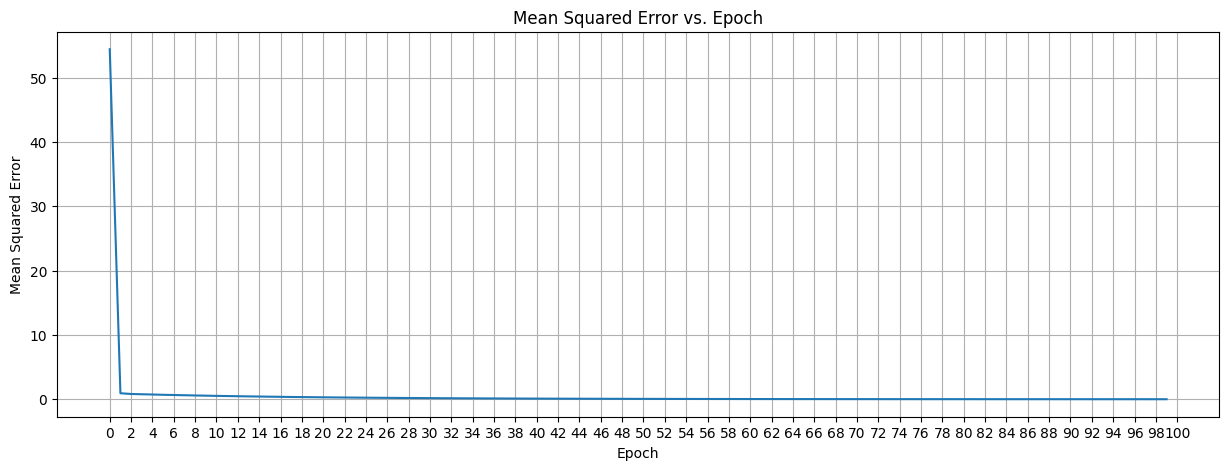

In [50]:
import matplotlib.pyplot as plt

all_mse_df = pd.DataFrame(all_mse)


plt.plot(all_mse_df['epoch'], all_mse_df['mse'])
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Epoch')
plt.grid()
plt.gcf().set_size_inches(15, 5)
plt.xticks(range(0, len(all_mse['epoch'])+1, 2))
plt.show()

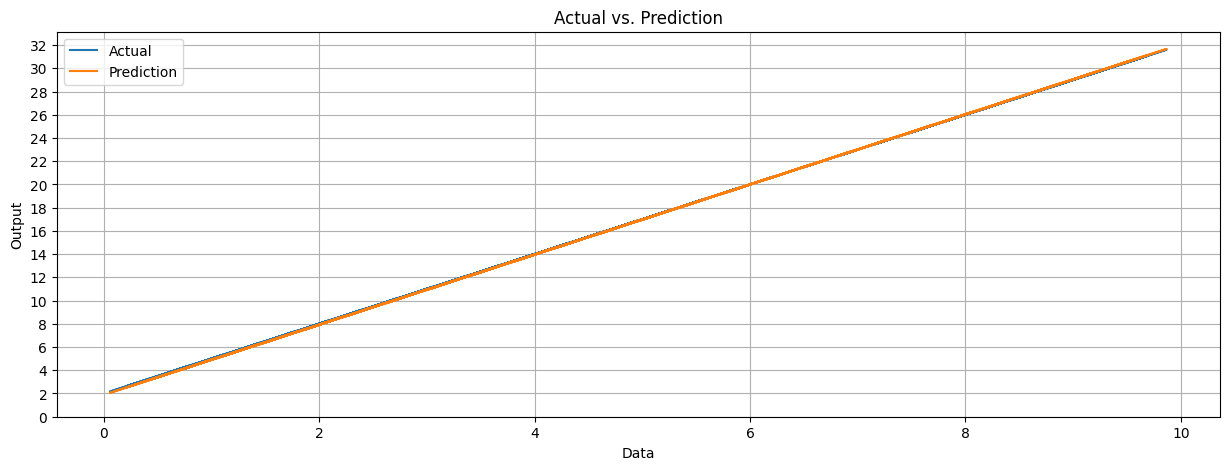

In [51]:
actual_pred_df = pd.DataFrame(actual_pred)

plt.plot(actual_pred_df['data'], actual_pred_df['actual'], label='Actual')
plt.plot(actual_pred_df['data'], actual_pred_df['prediction'], label='Prediction')
plt.xlabel('Data')
plt.ylabel('Output')
plt.title('Actual vs. Prediction')
plt.legend()
plt.grid()
plt.gcf().set_size_inches(15, 5)
plt.xticks(range(0, 11, 2))
plt.yticks(range(0, 33, 2))
plt.show()

#### Task 6.6:
Modify the code in Example 2 to approximate f(x,y) = 2x + 3y.

In [52]:
np.random.seed(42) # For reproducibility
num_samples = 100
x = np.random.uniform(low=0, high=10, size=num_samples)
y= np.random.uniform(low=0, high=10, size=num_samples)
z = 3 * x + 2 * y
# Create a DataFrame to store the data
data = pd.DataFrame({'x': x, 'y': y, 'z': z})
# Extract the values of all columns (variables x and y) except the last one fromDataFrame
F = data.iloc[:, :-1].values
# Extract the values of the last column (output z) from DataFrame
O = data.iloc[:, -1].values

# Create a perceptron instance with appropriate input size
input_size = 2
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=10)
# Train the perceptron on the dataset
perceptron.trainSGD(F, O)
#Test the trained model
for dataX, dataY in zip(x, y):
    data_point = np.array([dataX, dataY])
    prediction = perceptron.predict(data_point)
    actual = 3 * dataX + 2 * dataY
    print(f"Input: ({dataX:.2f}, {dataY:.2f}), Actual: {actual:.2f}, Prediction: {prediction:.2f}")

Epoch 1/10, Mean Squared Error:84.1794
Epoch 2/10, Mean Squared Error:0.8763
Epoch 3/10, Mean Squared Error:0.2034
Epoch 4/10, Mean Squared Error:0.1000
Epoch 5/10, Mean Squared Error:0.0805
Epoch 6/10, Mean Squared Error:0.0744
Epoch 7/10, Mean Squared Error:0.0716
Epoch 8/10, Mean Squared Error:0.0694
Epoch 9/10, Mean Squared Error:0.0679
Epoch 10/10, Mean Squared Error:0.0643
Input: (3.75, 0.31), Actual: 11.86, Prediction: 12.31
Input: (9.51, 6.36), Actual: 41.25, Prediction: 41.11
Input: (7.32, 3.14), Actual: 28.25, Prediction: 28.38
Input: (5.99, 5.09), Actual: 28.13, Prediction: 28.23
Input: (1.56, 9.08), Actual: 22.83, Prediction: 22.94
Input: (1.56, 2.49), Actual: 9.67, Prediction: 10.11
Input: (0.58, 4.10), Actual: 9.95, Prediction: 10.36
Input: (8.66, 7.56), Actual: 41.10, Prediction: 40.94
Input: (6.01, 2.29), Actual: 22.61, Prediction: 22.85
Input: (7.08, 0.77), Actual: 22.78, Prediction: 23.05
Input: (0.21, 2.90), Actual: 6.41, Prediction: 6.90
Input: (9.70, 1.61), Actual:

## 7. Performance of Perceptron on Nonlinear problems

#### Task 6.7:
 Run the code in Example 1 to solve the logical XOR operation with 1000 epochs and
compute the accuracy of the tested samples. [note: you need to change the training and testing
data to reflect XOR logical operation.]

In [53]:
import numpy as np
class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        # Initialize weights and bias with random values
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        # Set learning rate and number of epochs
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step_activation(self, x):
        # Step activation function
        return 1 if x >= 0 else 0
    
    def predict(self, x):
        # Compute the weighted sum of inputs and bias
        net_input = np.dot(x, self.weights) + self.bias
        # Apply step activation function to the net input
        return self.step_activation(net_input)
    
    def trainSGD(self, X, y):
        # Training loop
        for epoch in range(self.epochs):

            # Initialize Mean Squared Error for this epoch
            total_mse = 0.0

            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # Iterate over each shuffled training example
            for i in range(len(X_shuffled)):
                # Make a prediction for the current input
                prediction = self.predict(X_shuffled[i])
                # Compute the error (desired - predicted)
                error = y_shuffled[i] - prediction
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * error * X_shuffled[i]
                self.bias += self.learning_rate * error
                # Accumulate the squared error for this example
                total_mse += error ** 2

            # Calculate the mean squared error for this epoch
            mean_mse = total_mse / len(X)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error:{mean_mse:.4f}")

In [54]:
from sklearn.metrics import accuracy_score

# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

y_predic = []

# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=1000)

# Train the perceptron on the dataset
perceptron.trainSGD(X, y)

# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

for data in test_data:
    prediction = perceptron.predict(data)
    y_predic.append(prediction)
    print(f"Input: {data}, Prediction: {prediction}")

accuracy = accuracy_score(y, y_predic)
print(f"Accuracy: {accuracy}")

Epoch 1/1000, Mean Squared Error:0.5000
Epoch 2/1000, Mean Squared Error:0.5000
Epoch 3/1000, Mean Squared Error:0.5000
Epoch 4/1000, Mean Squared Error:0.5000
Epoch 5/1000, Mean Squared Error:0.5000
Epoch 6/1000, Mean Squared Error:0.5000
Epoch 7/1000, Mean Squared Error:0.2500
Epoch 8/1000, Mean Squared Error:0.2500
Epoch 9/1000, Mean Squared Error:0.2500
Epoch 10/1000, Mean Squared Error:0.2500
Epoch 11/1000, Mean Squared Error:0.2500
Epoch 12/1000, Mean Squared Error:0.2500
Epoch 13/1000, Mean Squared Error:0.2500
Epoch 14/1000, Mean Squared Error:0.2500
Epoch 15/1000, Mean Squared Error:0.2500
Epoch 16/1000, Mean Squared Error:0.2500
Epoch 17/1000, Mean Squared Error:0.2500
Epoch 18/1000, Mean Squared Error:0.2500
Epoch 19/1000, Mean Squared Error:0.2500
Epoch 20/1000, Mean Squared Error:0.2500
Epoch 21/1000, Mean Squared Error:0.2500
Epoch 22/1000, Mean Squared Error:0.2500
Epoch 23/1000, Mean Squared Error:0.2500
Epoch 24/1000, Mean Squared Error:0.2500
Epoch 25/1000, Mean Squar

#### Task 6.8:
Run the code in Example 1 to solve the logical XOR operation with 10000 epochs and
compute the accuracy of the tested samples. Does the perceptron perform well on approximating
XOR with more epochs? Justify your answer.

In [55]:
from sklearn.metrics import accuracy_score

# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

y_predic = []

# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=10000)

# Train the perceptron on the dataset
perceptron.trainSGD(X, y)

# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

for data in test_data:
    prediction = perceptron.predict(data)
    y_predic.append(prediction)
    print(f"Input: {data}, Prediction: {prediction}")

accuracy = accuracy_score(y, y_predic)
print(f"Accuracy: {accuracy}")

Epoch 1/10000, Mean Squared Error:0.5000
Epoch 2/10000, Mean Squared Error:0.5000
Epoch 3/10000, Mean Squared Error:0.5000
Epoch 4/10000, Mean Squared Error:0.5000
Epoch 5/10000, Mean Squared Error:0.5000
Epoch 6/10000, Mean Squared Error:0.5000
Epoch 7/10000, Mean Squared Error:0.5000
Epoch 8/10000, Mean Squared Error:0.5000
Epoch 9/10000, Mean Squared Error:0.5000
Epoch 10/10000, Mean Squared Error:0.5000
Epoch 11/10000, Mean Squared Error:0.2500
Epoch 12/10000, Mean Squared Error:0.2500
Epoch 13/10000, Mean Squared Error:0.2500
Epoch 14/10000, Mean Squared Error:0.2500
Epoch 15/10000, Mean Squared Error:0.2500
Epoch 16/10000, Mean Squared Error:0.2500
Epoch 17/10000, Mean Squared Error:0.2500
Epoch 18/10000, Mean Squared Error:0.2500
Epoch 19/10000, Mean Squared Error:0.2500
Epoch 20/10000, Mean Squared Error:0.2500
Epoch 21/10000, Mean Squared Error:0.2500
Epoch 22/10000, Mean Squared Error:0.2500
Epoch 23/10000, Mean Squared Error:0.2500
Epoch 24/10000, Mean Squared Error:0.2500
E

both with 1000 or even 10000 epochs percebtrone failed to solve XOR logic with accuracy 50%

## 8. Building and experimenting MLPs with Scikit Learn

### Example 3:
Python code for building and training an MLP using MLPClassifier

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Test Accuracy: 0.7000


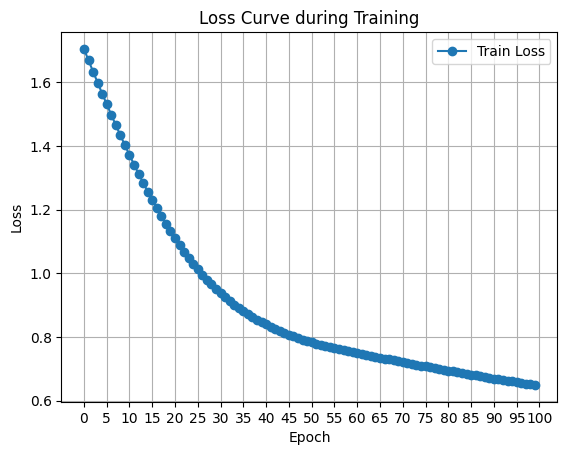

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

#Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=100)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.xticks(range(0, 101, 5))
plt.show()

#### Task 6.9:
 Run the code in Example 3 with the following customization of the MLPClassifier. For each
case, save the results and compare the accuracy of the testing samples and the loss plot for each
case.
1. hidden_layer_sizes=(10, ), max_iter=1000
2. hidden_layer_sizes=(50, ), activation=relu, , max_iter=1000, learning_rate=0.01
3. hidden_layer_sizes=(35, 15), activation=tanh, max_iter=1000, learning_rate=0.01

1. hidden_layer_sizes=(10, ), max_iter=1000

Test Accuracy: 1.0000


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


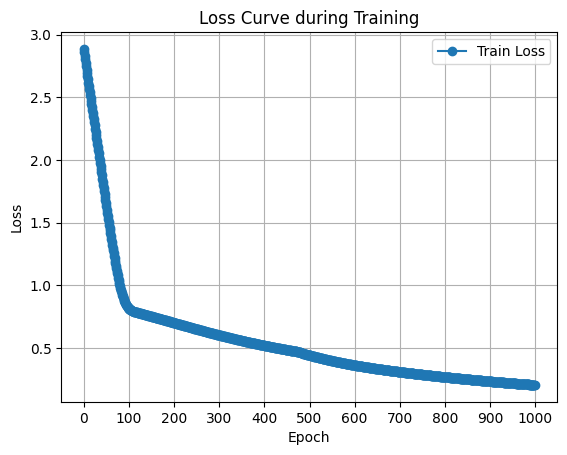

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

#Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.xticks(range(0, 1001, 100))
plt.show()

2. hidden_layer_sizes=(50, ), activation=relu, , max_iter=1000, learning_rate=0.01

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Test Accuracy: 1.0000


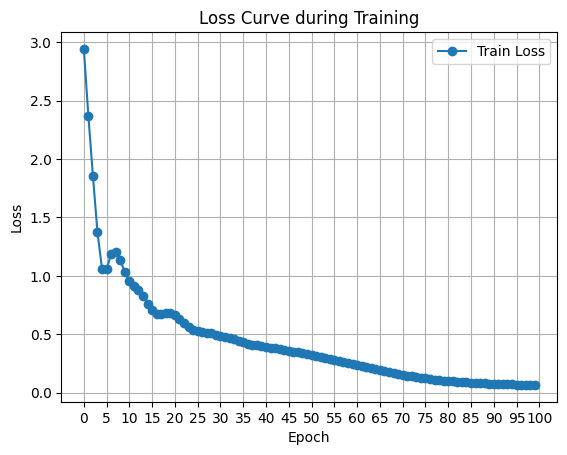

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

#Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, activation='relu', learning_rate='constant', learning_rate_init=0.01)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(0, 101, 5))
plt.legend()
plt.grid()
plt.show()

3. hidden_layer_sizes=(35, 15), activation=tanh, max_iter=1000, learning_rate=0.01

Test Accuracy: 1.0000


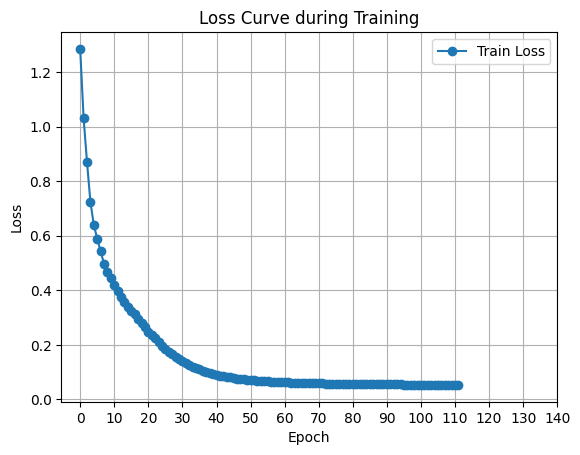

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


mlp = MLPClassifier(hidden_layer_sizes=(35,15), max_iter=1000, activation='tanh', learning_rate='constant', learning_rate_init=0.01)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.xticks(range(0, 150, 10))
plt.show()

### Example 4: 
Python code for training two MLPClassifiers and plotting the MSE loss and the
decision boundary of each trained model.


In [60]:
# !pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


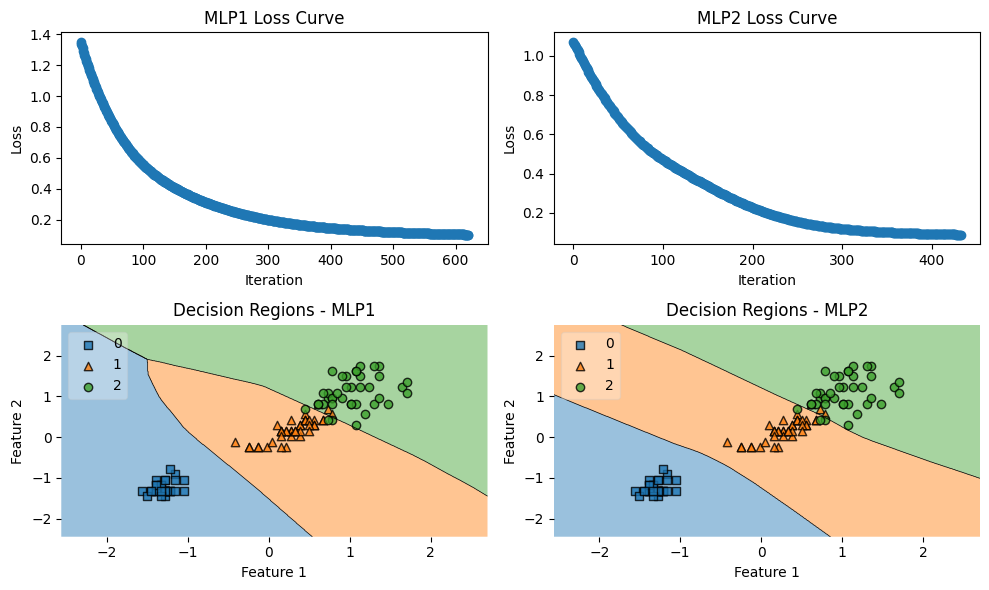

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Select the two most important features based on information gain
k_best = SelectKBest(score_func=mutual_info_classif, k=2)
X_selected = k_best.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2,random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create two MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp2 = MLPClassifier(hidden_layer_sizes=(35,15), max_iter=1000, random_state=42)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')



# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()
# Show the plot
plt.show()

#### Task 6.10: 
Run the code in Example 4. According to the decision boundary of each model, which
one is better? Justify your answer.

according to the loss plot model 2 after 400 interation reaches same lose as model 1 reaches after 600 iteration

#### Task 6.11: 
Modify Example 4 by using PCA to choose the best two features instead of using
information gain. According to the decision boundary of each model, which one is better? Justify
your answer.

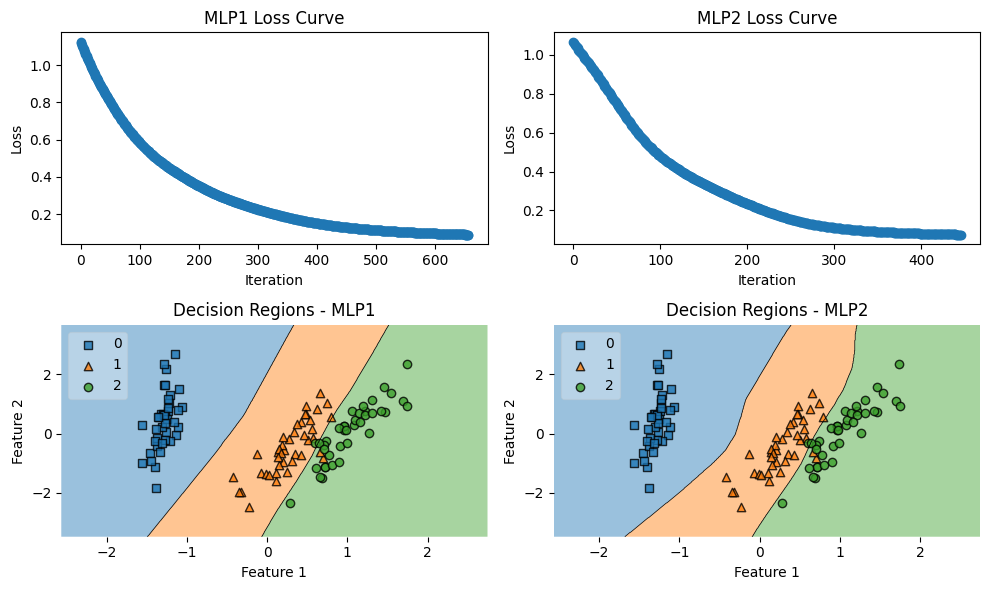

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# # Select the two most important features based on information gain
# k_best = SelectKBest(score_func=mutual_info_classif, k=2)
# X_selected = k_best.fit_transform(X, y)

# Create PCA instance and fit to the data
pca = PCA(n_components=2)  # Specify the number of components
X_selected = pca.fit_transform(X, y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2,random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create two MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp2 = MLPClassifier(hidden_layer_sizes=(35,15), max_iter=1000, random_state=42)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')



# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()
# Show the plot
plt.show()

according to the loss plot model 2 after 400 interation reaches same lose as model 1 reaches after 600 iteration

## 9. Choosing Network Structure

### Example 5: 
Python code for building and training three MLPClassifiers on the spiral data set

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


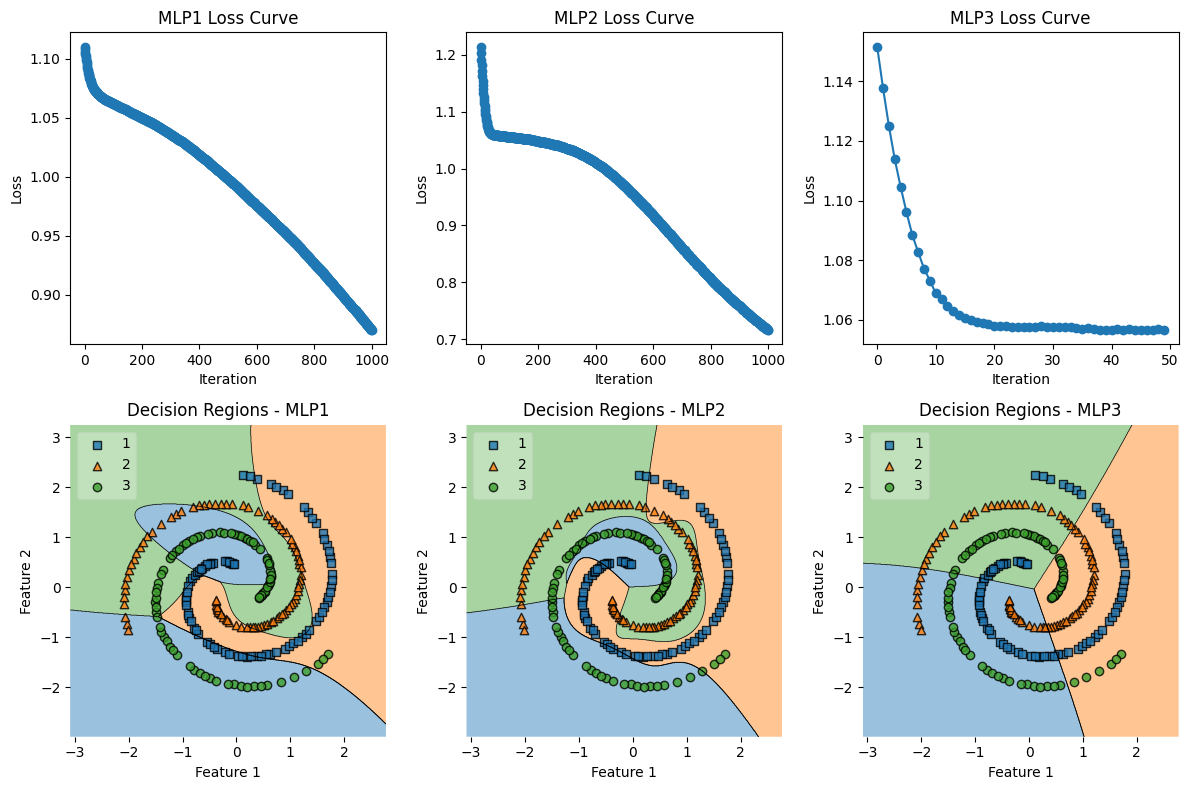

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = 'spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000, random_state=42,activation='tanh',learning_rate_init=0.001)

mlp2 = MLPClassifier(hidden_layer_sizes=(40), max_iter=1000, random_state=42,activation='tanh', learning_rate_init=0.001)

mlp3 = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42,activation='tanh', learning_rate_init=0.001)


# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)


# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')


# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

#### Task 6.12: 
Run the code in Example Five and save the resulted plots. 
1. Which model performs
better in the spiral data set? 
2. If we increase the iteration to 10,000, does the first model (mlp1) fit
the data? Justify your answer.

1)

        mode1 2 performs better in terms of loss function

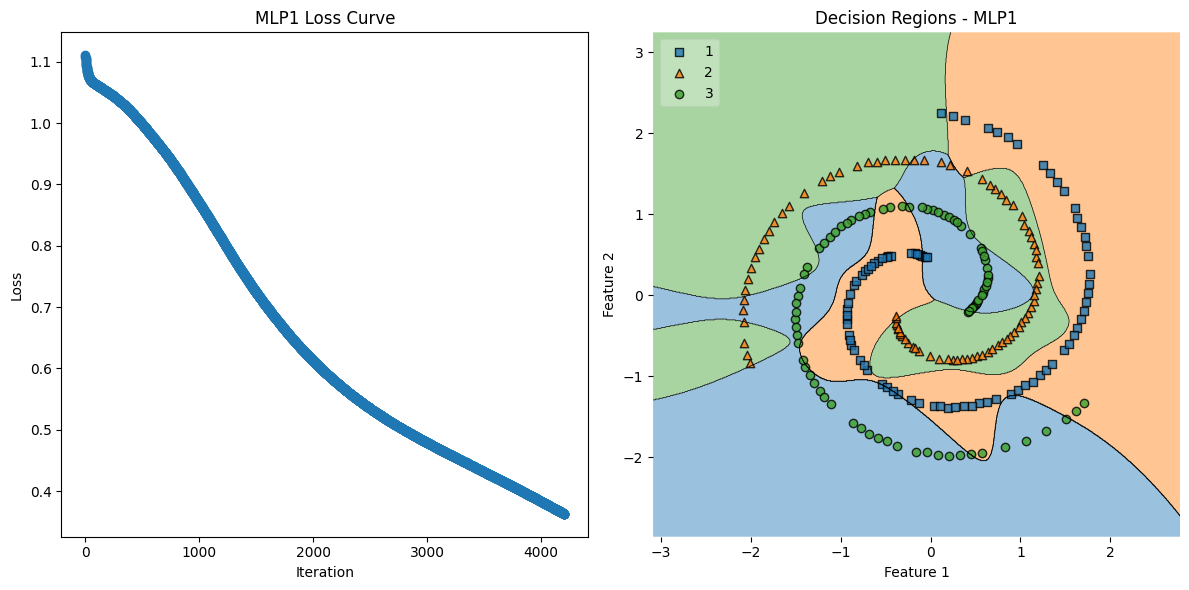

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = 'spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(10), max_iter=10000, random_state=42,activation='tanh',learning_rate_init=0.001)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot loss curve for mlp1
axes[0].plot(mlp1.loss_curve_, marker='o')
axes[0].set_title('MLP1 Loss Curve')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Loss')


# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1])
axes[1].set_title('Decision Regions - MLP1')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

model 1 performs better as number of iterations become 10000 as the loss reaches 0.4 at 4000 iterations

#### Task 6.13: 
Modify the models in Example 5  to use the relu activation function.
Run the modified code and save the resulting plots. Which model performs better in the spiral data
set? 
4. Compared to the models built in Example 5, does changing the activation function improve
performance in these models? Justify your answer.

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


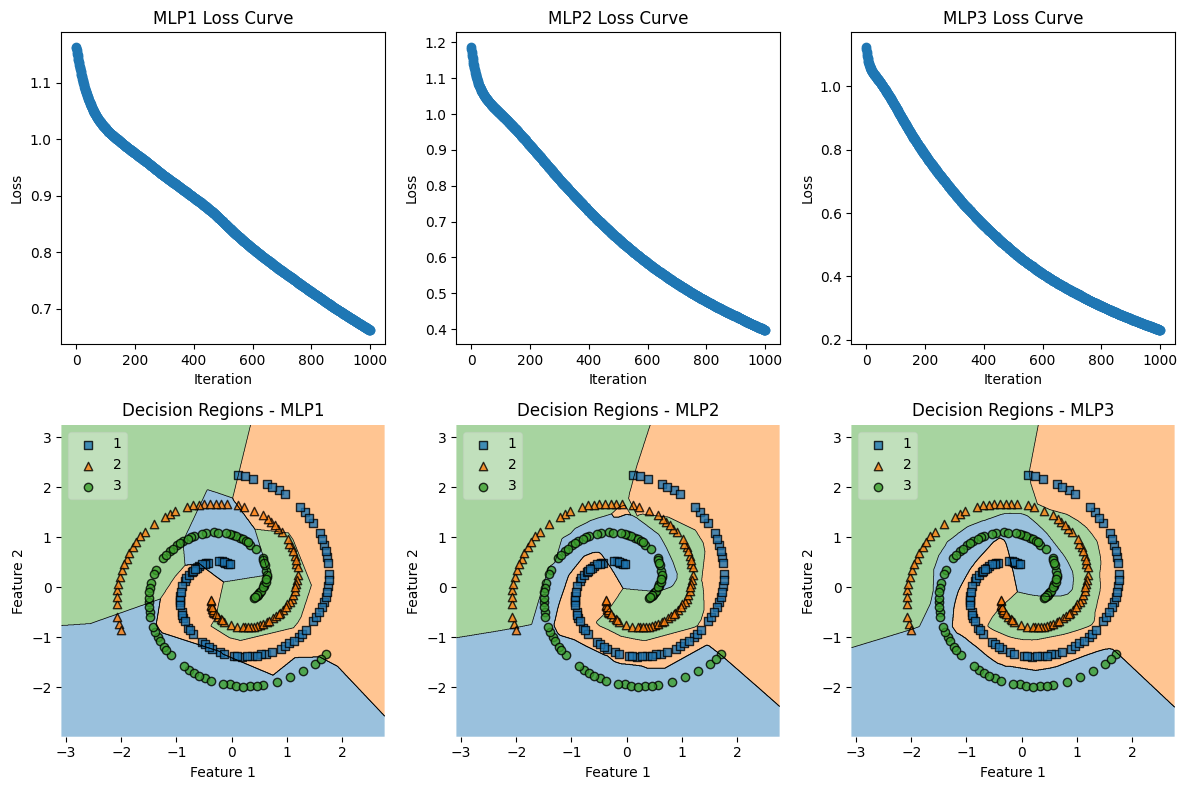

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = 'spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000, random_state=42,activation='relu',learning_rate_init=0.001)

mlp2 = MLPClassifier(hidden_layer_sizes=(40), max_iter=1000, random_state=42,activation='relu', learning_rate_init=0.001)

mlp3 = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42,activation='relu', learning_rate_init=0.001)


# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)


# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')


# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

#### Task 6.14:
1. Modify the models in Example 5  to have the following hyperparameters. 
    - mlp1:hidden_layer_sizes=(7, 3), 
    - mlp2: hidden_layer_sizes=(27, 13),  
    - mlp3 hidden_layer_sizes=(70, 30),

    all of them using the relu activation function.


2. Run the modified code and save the resulting plots.
3. Which model performs better in the spiral data set?
4. Compared to the models built in Example 5 and Task 13, which of these models performs better
in the spiral data set? Justify your answer.

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


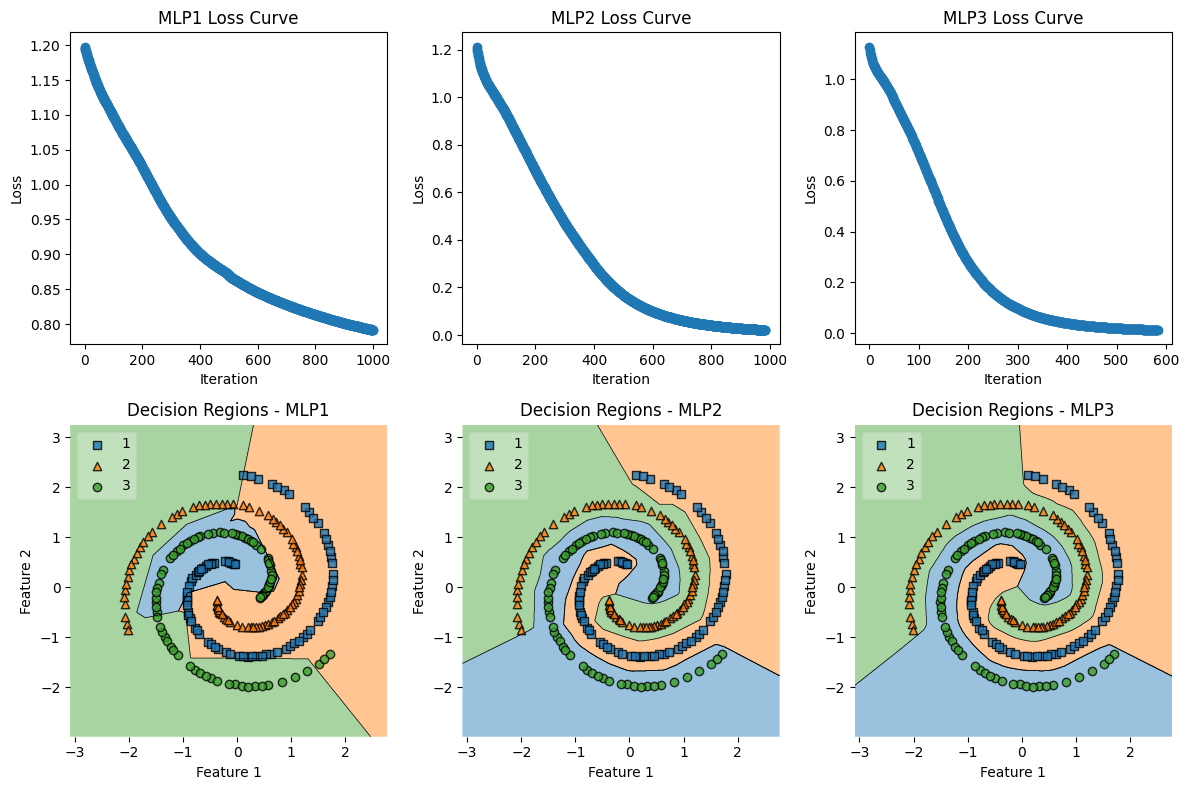

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = 'spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(7,3), max_iter=1000, random_state=42,activation='relu',learning_rate_init=0.001)

mlp2 = MLPClassifier(hidden_layer_sizes=(27,13), max_iter=1000, random_state=42,activation='relu', learning_rate_init=0.001)

mlp3 = MLPClassifier(hidden_layer_sizes=(70,30), max_iter=1000, random_state=42,activation='relu', learning_rate_init=0.001)


# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)


# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')


# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

the best model across all models in example 5 was 

**mlp3 = MLPClassifier(hidden_layer_sizes=(70,30), max_iter=1000, random_state=42,activation='relu', learning_rate_init=0.001)**

in terms of loss function as at 600 iteration the loss becomes 0

#### Task 6.15: 
use GridSearchCV method to automatically select hyperparameters

In [96]:
from sklearn.model_selection import GridSearchCV

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = 'spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


parameters={'hidden_layer_sizes':[(10,),(20,),(70,),(90,),(10,50)],'activation':['relu','tanh'],'learning_rate_init':[0.001,0.01,0.1]}


mlp = MLPClassifier(max_iter=1000, random_state=42)

clf = GridSearchCV(mlp, parameters)

clf.fit(X_train, y_train)

print(sorted(clf.cv_results_.keys()))

print(clf.best_params_)

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  war

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_activation', 'param_hidden_layer_sizes', 'param_learning_rate_init', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
{'activation': 'tanh', 'hidden_layer_sizes': (10, 50), 'learning_rate_init': 0.01}


{'activation': 'tanh', 'hidden_layer_sizes': (10, 50), 'learning_rate_init': 0.01}

returned as best parameters

## 10. Handling Overfitting in ANNs

### Example 6: 
Python code for training three MLP classifiers with different value of alpha

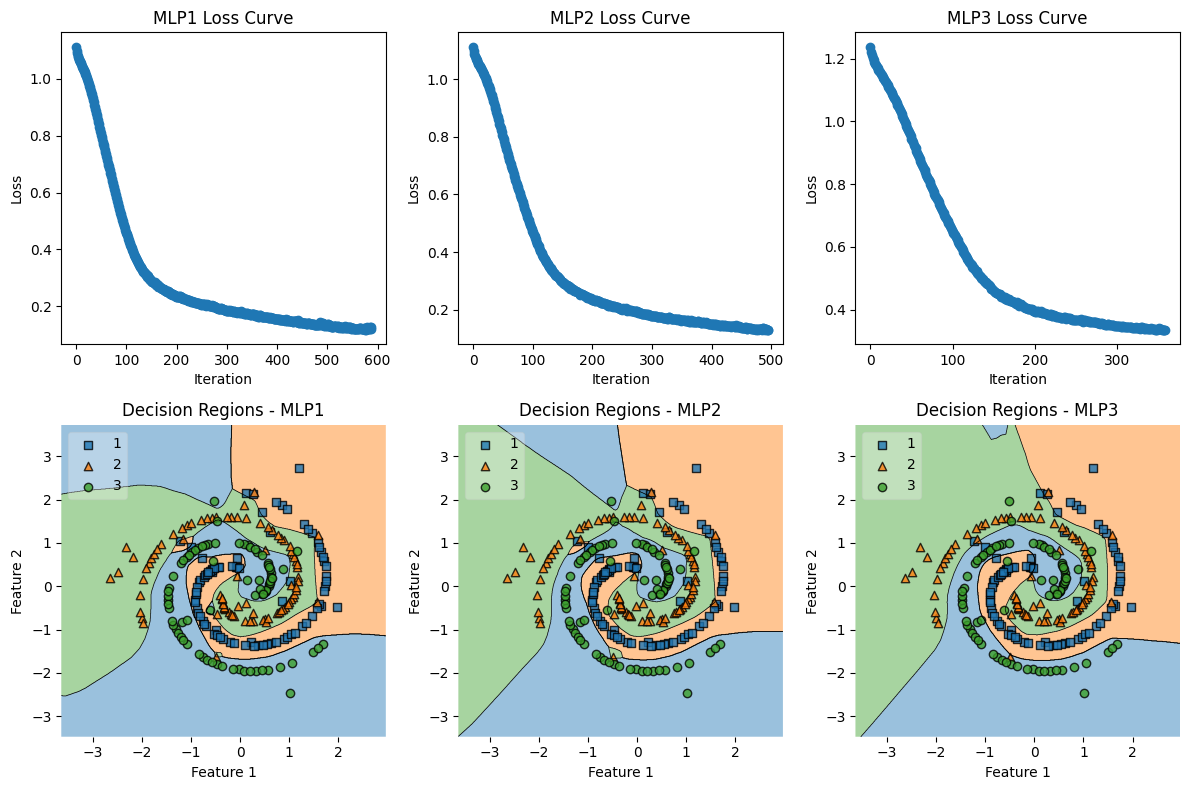

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import numpy as np

file_path = 'spiral.csv'
data = pd.read_csv(file_path)

# Add outliers to a random subset of the data
outlier_fraction = 0.2 # Adjust the fraction of outliers based on your preference
outliers_mask = np.random.rand(data.shape[0]) < outlier_fraction
spiral_data_with_outliers = data.copy()
spiral_data_with_outliers.iloc[outliers_mask, :2] += np.random.uniform(-7, 7,(np.sum(outliers_mask), 2))

# Assuming the last column is the target variable and the rest are features
X = spiral_data_with_outliers.iloc[:, :-1]
y = spiral_data_with_outliers.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  alpha: Float = 0.0001
mlp1 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000,random_state=42, solver='adam',learning_rate_init=0.001, beta_1=0.9,beta_2=0.999, epsilon=1e-8)

# alpha: Float = 0.001
mlp2 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000,random_state=42, solver='adam',learning_rate_init=0.001, beta_1=0.9,beta_2=0.999, epsilon=1e-8, alpha=0.001)
# alpha: Float = 0.3
mlp3 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000,random_state=42, solver='adam',learning_rate_init=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, alpha=0.3)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))


# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')


# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

#### Task 6.16: 
Run Example 6 and figure out which value of alpha does better. Justify your answer.

In [98]:
from sklearn.model_selection import GridSearchCV

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = 'spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


parameters={'alpha':[0.0001,0.001,0.3]}



mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000,random_state=42, solver='adam',learning_rate_init=0.001, beta_1=0.9,beta_2=0.999, epsilon=1e-8)


clf = GridSearchCV(mlp, parameters)

clf.fit(X_train, y_train)



print(clf.best_params_)

{'alpha': 0.0001}


according to GridSearchCV **'alpha': 0.0001** is the best